# Molecuar Dynamics Processing - automatic Data Visualisation of MD output files #

*Motivation*: This notebook has been created in order to automatically plot and save figures of specific files found in many subdirectories in a "root" directory. This script was necessary for the evaluation of multiple molecular dynamics simulations at once and has enabled a fast processing and visualisation of data generated from MDs. The files generated are saved in the specified path and titles are assigned based on the directory name they are found in. The paths, name of directories and file names to be plotted can all be changed and adapted to the user's need. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Plot titles and directories list #

In [2]:
#This will make a list with the names of the directories in your path. As it has been written in the codes below, this will correspond to the graph title 
root = r"D:\Batch_Simulation_1\lustre\scratch\ucbenae\20ns.2"
nameList = []
for root, dirs, files in os.walk(root):
    for name in dirs: #if you want your plot title to be your file name, change dirs into files and should do the trick
            nameList.append(name)
nameList.sort(key=len)

In [3]:
nameList

['10', '13', '56', '152', '235', '236', '290']

In [8]:
root = r"D:\Batch_Simulation_1\lustre\scratch\ucbenae\20ns.2"
directoriesList = []
for root, dirs, files in os.walk(root):
    for direct in dirs: #if you want your plot title to be your file name, change dirs into files and should do the trick
            directoriesList.append(root + '\\' + direct)
directoriesList.sort(key=len)

In [9]:
directoriesList

['D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\10',
 'D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\13',
 'D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\56',
 'D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\152',
 'D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\235',
 'D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\236',
 'D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\290']

# Density

In [15]:
root = r"D:\Batch_Simulation_1\lustre\scratch\ucbenae\20ns.2"
densityList = []
for root, dirs, files in os.walk(root):
    for file in files:
        if file.endswith("density.xvg"): # notice that the files I used were txt. if you have xvg formatted thata should work as well! If not contact me.
            densityList.append( root + '\\' + file) # this creates a list with all the paths where your files are at
            densityList.sort(key=len)

In [16]:
densityList

['D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\10\\density.xvg',
 'D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\13\\density.xvg',
 'D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\56\\density.xvg',
 'D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\152\\density.xvg',
 'D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\235\\density.xvg',
 'D:\\Batch_Simulation_1\\lustre\\scratch\\ucbenae\\20ns.2\\236\\density.xvg']

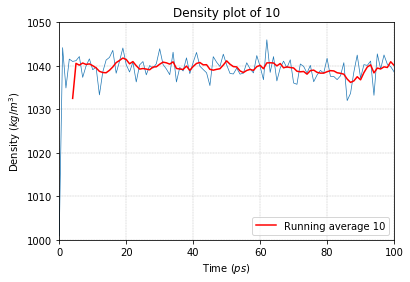

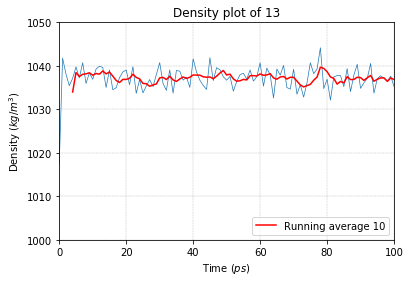

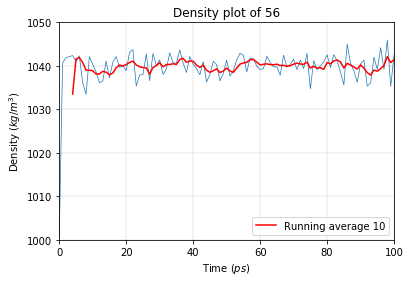

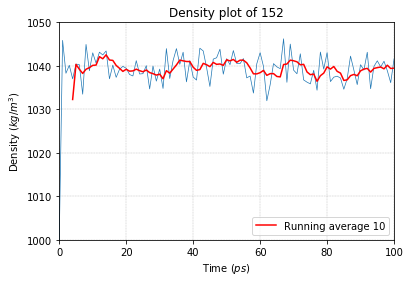

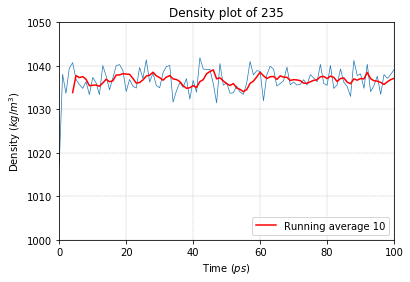

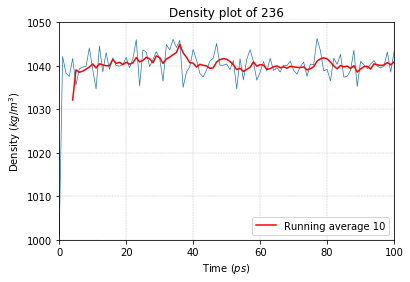

In [17]:
for d, n, p in zip(densityList, nameList, directoriesList):
    f = np.loadtxt(d, comments =('#', '@'))
    x = [fi[0] for fi in f]
    y = [fi[1] for fi in f]
    df = pd.DataFrame(f)
    df.columns=['x','y']
    plt.plot(x, y, markerfacecolor='b', linewidth=0.7)
    plt.xlim(0, 100)
    plt.ylim(1000, 1050)
    rolling_mean = df.y.rolling(window=5).mean()
    plt.plot(df.x, rolling_mean, label='Running average 10', color='red')
    plt.legend(loc='lower right')
    plt.xlabel('Time ($ps$)')
    plt.ylabel('Density ($kg/m^3$)')
    plt.grid(color='grey', linestyle='-.', linewidth=0.25)
    plt.title('Density plot of ' + n)
    plt.savefig(p + '\\density.pdf')
    plt.show()

# Temperature Profile

In [18]:
root = r"D:\Batch_Simulation_1\lustre\scratch\ucbenae\20ns.2"
energyList = []
for root, dirs, files in os.walk(root):
    for file in files:
        if file.endswith('energy.xvg'):
            energyList.append(root +'\\'+ file)
energyList.sort(key=len)

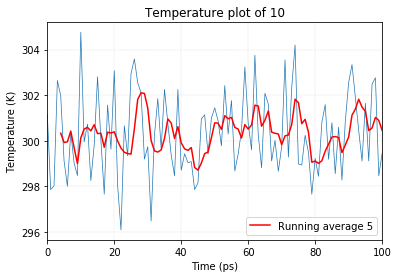

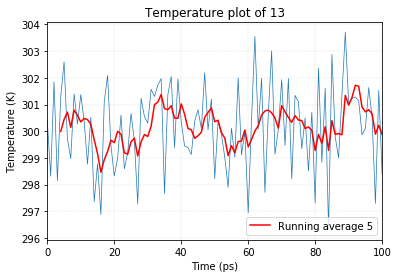

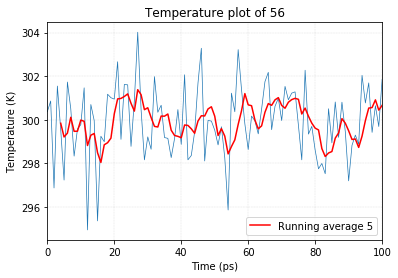

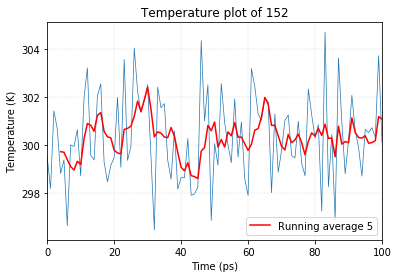

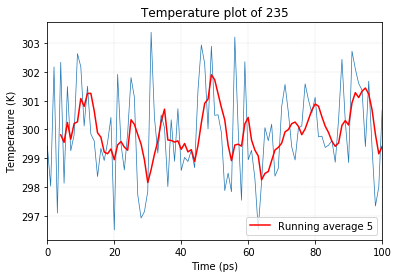

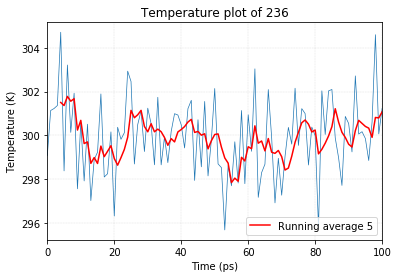

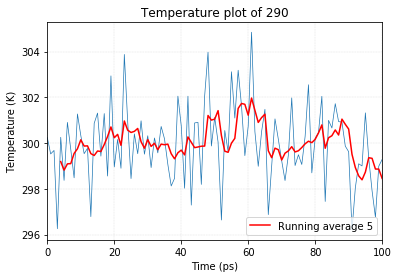

In [19]:
for e, n, p in zip(energyList, nameList, directoriesList):
    f = np.loadtxt(e, comments =('#', '@'))
    x = [fi[0] for fi in f]
    y = [fi[1] for fi in f]
    df = pd.DataFrame(f)
    df.columns=['x','y']
    plt.plot(x, y, markerfacecolor='b', linewidth=0.7)
    plt.xlim(0, 100)
    rolling_mean = df.y.rolling(window=5).mean()
    plt.plot(df.x, rolling_mean, label='Running average 5', color='red')
    plt.legend(loc='lower right')
    plt.xlabel('Time (ps)')
    plt.ylabel('Temperature (K)')
    plt.grid(color='grey', linestyle='-.', linewidth=0.25, alpha=0.5)
    plt.title('Temperature plot of ' + n)
    plt.savefig(p + '\\temperature.pdf')
    plt.show()

# Pressure Profile

In [20]:
root = r"D:\Batch_Simulation_1\lustre\scratch\ucbenae\20ns.2"
pressureList = []
for root, dirs, files in os.walk(root):
    for file in files:
        if file.endswith('pressure.xvg'):
            pressureList.append(root +'\\'+ file)
pressureList.sort(key=len)

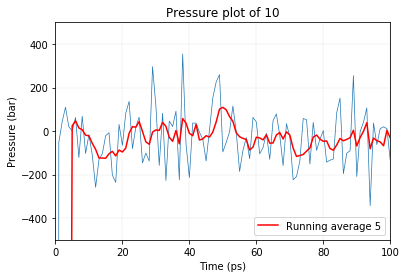

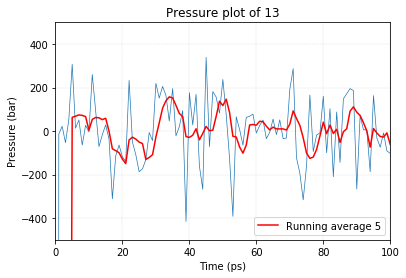

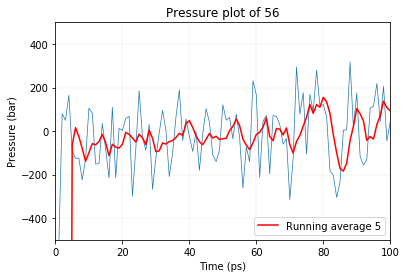

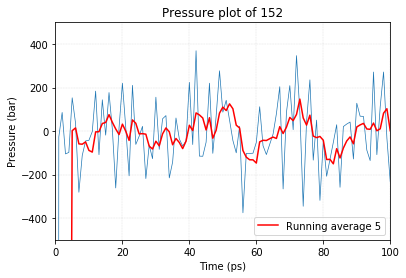

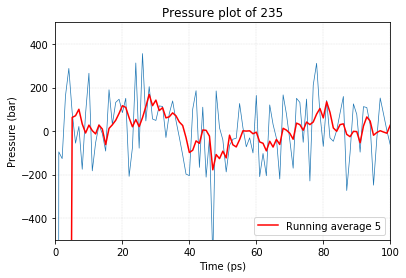

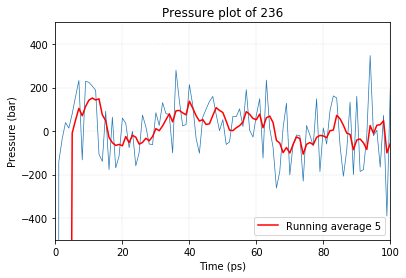

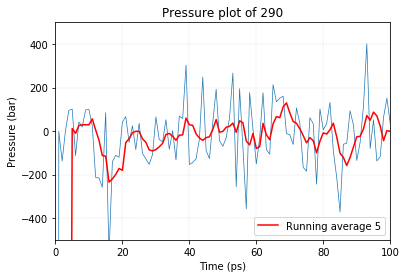

In [21]:
for p, n, d in zip(pressureList, nameList, directoriesList):
    f = np.loadtxt(p, comments =('#', '@'))
    x = [fi[0] for fi in f]
    y = [fi[1] for fi in f]
    df = pd.DataFrame(f)
    df.columns=['x','y']
    plt.plot(x, y, markerfacecolor='b', linewidth=0.7)
    plt.xlim(0, 100)
    plt.ylim(-500, 500)
    rolling_mean = df.y.rolling(window=5).mean()
    plt.plot(df.x, rolling_mean, label='Running average 5', color='red')
    plt.legend(loc='lower right')
    plt.xlabel('Time (ps)')
    plt.ylabel('Pressure (bar)')
    plt.grid(color='grey', linestyle='-.', linewidth=0.25, alpha=0.5)
    plt.title('Pressure plot of ' + n)
    plt.savefig(d + '\\pressure.pdf')
    plt.show()

# Root Mean Square Deviation

The RMSD is the root mean squared Euclidean distance in 3N configuration space as function of the time step

$$ρ^{RMSD}(t)=\sqrt{\frac{1}{N}\sum_{n=1}^{N}(r_{i}(t)−r^{ref}_{i})}$$

between the current coordinates $r_{i}(t)$ at time t and the reference coordinates $r^{ref}_{i}$.

We compute the **RMSD** with gmx rms with respect to the reference starting structure (the one used for creating the md.tpr file).

In [22]:
root = r"D:\Batch_Simulation_1\lustre\scratch\ucbenae\20ns.2"
rmsdList = []
for root, dirs, files in os.walk(root):
    for file in files:
        if file.endswith('rmsd.xvg'):
            rmsdList.append(root +'\\'+ file)
rmsdList.sort(key=len)

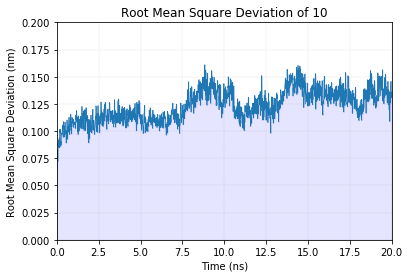

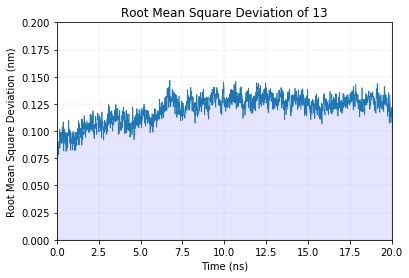

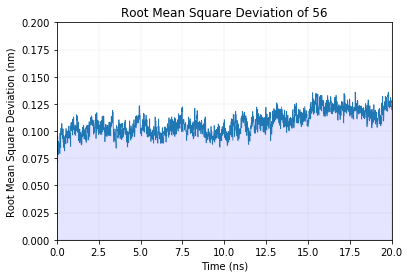

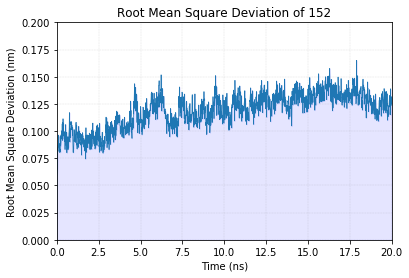

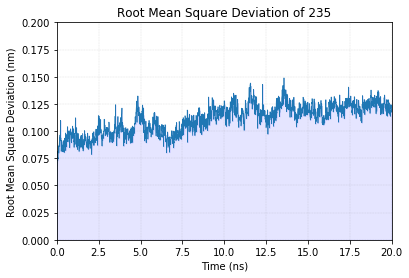

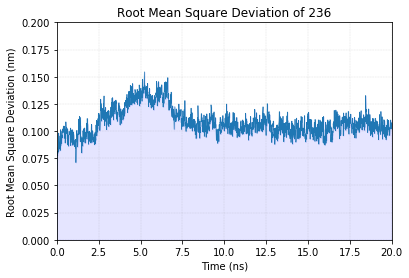

In [23]:
for r, n, d in zip(rmsdList, nameList, directoriesList):
    f = np.loadtxt(r, comments =('#', '@'))
    x = [fi[0] for fi in f]
    y = [fi[1] for fi in f]
    df = pd.DataFrame(f)
    df.columns=['x','y']
    plt.plot(x, y, markerfacecolor='b', linewidth=0.7, linestyle="-")
    plt.xlim(0, 20)
    plt.ylim(0, 0.2)
    plt.xlabel('Time (ns)')
    plt.ylabel('Root Mean Square Deviation (nm)')
    plt.fill_between(x, y, color="blue", linestyle="-", alpha=0.1) 
    plt.grid(color='grey', linestyle='-.', linewidth=0.25, alpha=0.5)
    plt.title('Root Mean Square Deviation of ' + n)
    plt.savefig(d + '\\rmsd.pdf')
    plt.show()

# Root Mean Square Fluctuation

The residue root mean square fluctuation **RMSF** is a measure of the flexibility of a residue. It is typically calculated for the $C_{α} atom of each residue and is then simply the square root of the variance of the fluctuation around the average position:

$$ρ^{RMSF}_{i}=\sqrt{\big\langle{(r_{i}-\langle{r_{i}}\rangle)^{2}}\big\rangle}$$ 

In [24]:
root = r"D:\Batch_Simulation_1\lustre\scratch\ucbenae\20ns.2"
rmsfList = []
for root, dirs, files in os.walk(root):
    for file in files:
        if file.endswith('rmsf_10ns.xvg'):
            rmsfList.append(root +'\\'+ file)
rmsfList.sort(key=len)

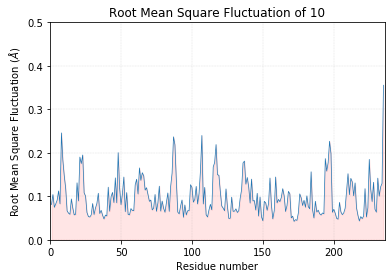

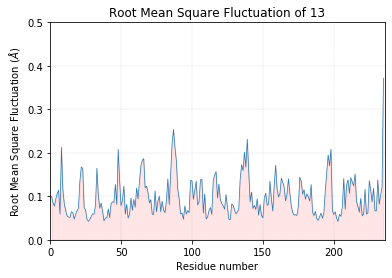

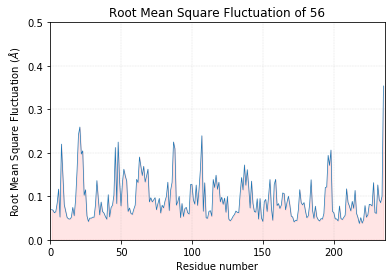

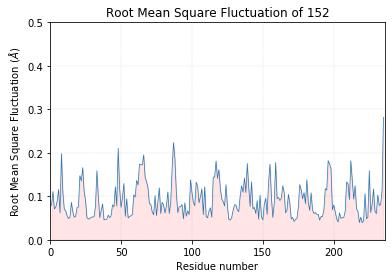

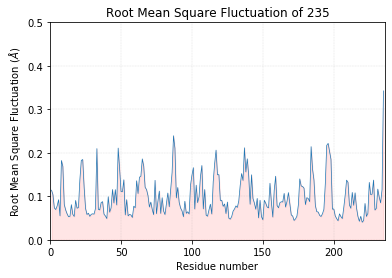

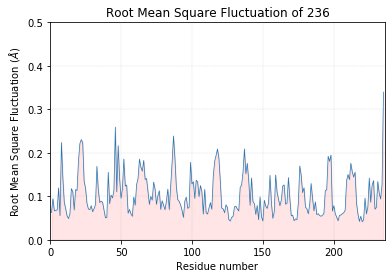

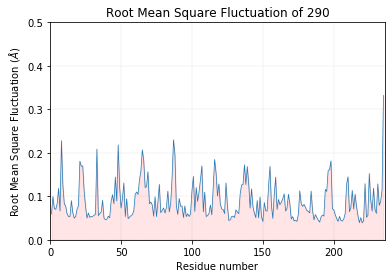

In [25]:
for r, n, d in zip(rmsfList, nameList, directoriesList):
    f = np.loadtxt(r, comments =('#', '@'))
    x = [fi[0] for fi in f]
    y = [fi[1] for fi in f]
    df = pd.DataFrame(f)
    df.columns=['x','y']
    plt.plot(x, y, markerfacecolor='red', linewidth=0.7)
    plt.fill_between(x, y, color="red", linestyle="-", alpha=0.1) 
    plt.xlim(0, 236)
    plt.ylim(0, 0.50)
    plt.xlabel('Residue number')
    plt.ylabel('Root Mean Square Fluctuation ($\AA$)')
    plt.grid(color='grey', linestyle='-.', linewidth=0.25, alpha=0.5)
    plt.title('Root Mean Square Fluctuation of ' + n)
    plt.savefig(d + '\\rmsf.pdf')
    plt.show()

# Radius of Gyration

The radius of gyration measures the compactness of a protein structure.

$$R^{2}_{gyr}=\frac{1}{M}\sum_{i=1}^{N}m_{i}(r_{i}-R)^{2}$$ 

where $M=\sum_{i=1}^{N}m_{i}$ is the total mass and $R= N^{-1}\sum_{i=1}^{N}r_{i}$ i the center of mass of the protein consisting of N atoms.

The Gromacs tool gmx gyrate can be used to compute the radius of gyration for the whole protein (using the pre-defined “Protein” index group)

In [26]:
root = r"D:\Batch_Simulation_1\lustre\scratch\ucbenae\20ns.2"
rogList = []
for root, dirs, files in os.walk(root):
    for file in files:
        if file.endswith('gyrate.xvg'):
            rogList.append(root +'\\'+ file)
rogList.sort(key=len)

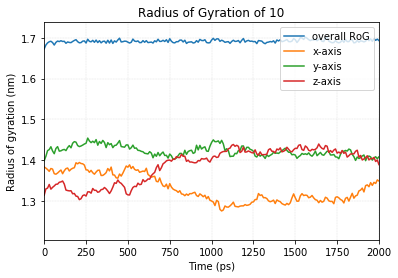

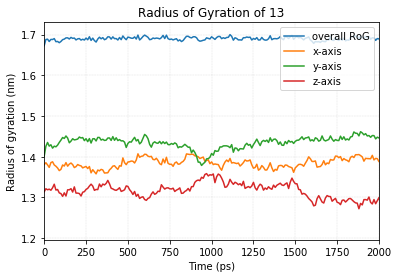

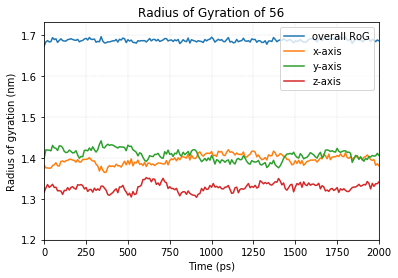

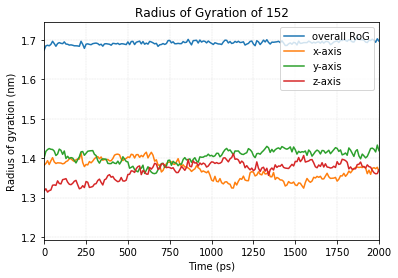

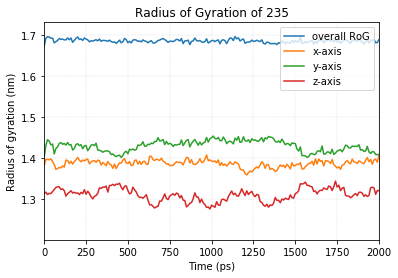

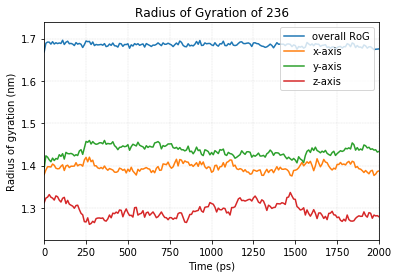

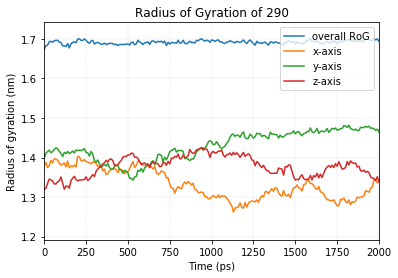

In [27]:
for r, n, d in zip(rogList, nameList, directoriesList):
    f = np.loadtxt(r, comments =('#', '@'))
    x = [fi[0] for fi in f]
    y = [fi[1] for fi in f]
    w = [fi[2] for fi in f]
    j = [fi[3] for fi in f]
    z = [fi[4] for fi in f]
    df = pd.DataFrame(f)
    df.columns=['x','y', 'w','j','z']
    plt.plot(x, y, markerfacecolor='b', label = 'overall RoG')
    plt.plot(x, w, markerfacecolor='g', label = 'x-axis')
    plt.plot(x, j, markerfacecolor='p', label = 'y-axis')
    plt.plot(x, z, markerfacecolor='r', label = 'z-axis')
    plt.xlim(0, 2000)
    plt.legend(loc='upper right')
    plt.xlabel('Time (ps)')
    plt.ylabel('Radius of gyration (nm)')
    plt.grid(color='grey', linestyle='-.', linewidth=0.25, alpha=0.5)
    plt.title('Radius of Gyration of ' + n)
    plt.savefig(d + '\\gyration.pdf')
    plt.show()

For more information and codes please visit [AdKGromacsTutorial] (https://adkgromacstutorial.readthedocs.io/en/latest/analysis.html). The equations were taken from there.